In [2]:
import os

In [3]:
%matplotlib inline

import bempp.api
import numpy as np
from matplotlib import pyplot as plt
import utils.Solvers

from utils.BC import BC

grid = bempp.api.shapes.sphere(r=1, origin=(0, 0, 0), h=0.15)

@bempp.api.real_callable
def neumann_data(x, n, domain_index, result):
    r = (x[0]**2 + x[1]**2 + x[2]**2)**(0.5)
    nx = x[0]/r
    ny = x[1]/r
    nz = x[2]/r

    # result[0] = nx/r
    # result[1] = ny/r
    # result[2] = nz/r
    result[0] = 1/r

dfun, nfun = utils.Solvers.Neumann(grid, BC(0, neumann_data, 0))

bempp.api.export('sphere_sol.msh', grid_function=-dfun)



In [8]:
os.system("gmsh 'sphere_sol.msh'&")

0

In [3]:
Nx = 200
Ny = 200
xmin, xmax, ymin, ymax = [-1.5, 1.5, -1.5, 1.5]
plot_grid = np.mgrid[xmin:xmax:Nx * 1j, ymin:ymax:Ny * 1j]
points = np.vstack((plot_grid[0].ravel(),
                    plot_grid[1].ravel(),
                    np.zeros(plot_grid[0].size)))

dp0_space = bempp.api.function_space(grid, "DP", 0)
p1_space = bempp.api.function_space(grid, "P", 1)

slp_pot = bempp.api.operators.potential.laplace.single_layer(
    dp0_space, points)
dlp_pot = bempp.api.operators.potential.laplace.double_layer(
    dp0_space, points)
u_evaluated = slp_pot * nfun - dlp_pot * dfun

import matplotlib
matplotlib.rcParams['figure.figsize'] = (5.0, 4.0)

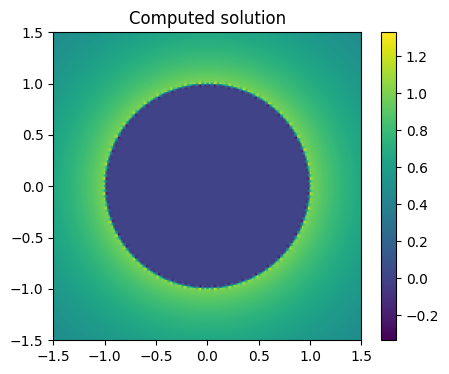

In [4]:

u_evaluated = slp_pot * nfun - dlp_pot * dfun
%matplotlib inline

u_evaluated = u_evaluated.reshape((Nx, Ny))


# plt.imshow(np.log(np.abs(u_evaluated.T)), extent=(-1,1,-1,1))
plt.imshow(u_evaluated.T, extent=(xmin, xmax, ymin, ymax))
plt.title('Computed solution')
plt.colorbar()

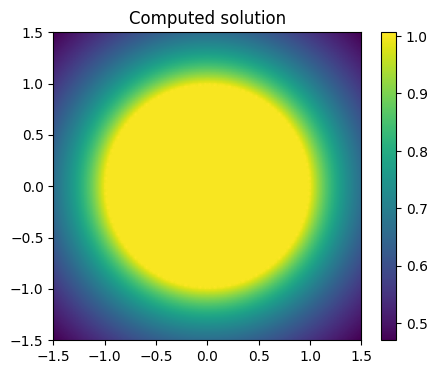

In [5]:
u_evaluated = slp_pot * nfun# - dlp_pot * dfun
%matplotlib inline
u_evaluated = u_evaluated.reshape((Nx, Ny))
plt.imshow(u_evaluated.T, extent=(xmin, xmax, ymin, ymax))
plt.title('Computed solution')
plt.colorbar()

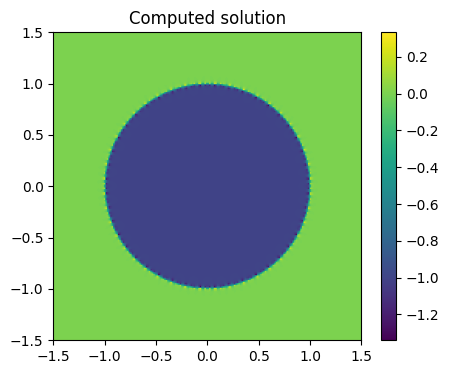

In [6]:
u_evaluated =  -dlp_pot * dfun
%matplotlib inline
u_evaluated = u_evaluated.reshape((Nx, Ny))
plt.imshow(u_evaluated.T, extent=(xmin, xmax, ymin, ymax))
plt.title('Computed solution')
plt.colorbar()

In [6]:
points = np.vstack(([0.99], [0], [0]))
dp0_space = bempp.api.function_space(grid, "DP", 0)

slp_pot = bempp.api.operators.potential.laplace.single_layer(dp0_space, points)
dlp_pot = bempp.api.operators.potential.laplace.double_layer(dp0_space, points)
slp_pot * nfun - dlp_pot * dfun

array([[0.13644868]])

In [11]:
for refinement in [1,2,3,4]:
    grid = bempp.api.shapes.regular_sphere(refinement)
    dfun, nfun = utils.Solvers.Neumann(grid, BC(0, neumann_data, 0))
    points = np.vstack([1, 0, 0])
    dp0_space = bempp.api.function_space(grid, "DP", 0)

    slp_pot = bempp.api.operators.potential.laplace.single_layer(dp0_space, points)
    dlp_pot = bempp.api.operators.potential.laplace.double_layer(dp0_space, points)
    print(slp_pot * nfun - dlp_pot * dfun)


[[0.68994875]]
[[0.5890878]]
[[0.54161132]]
[[0.52009082]]


In [7]:
@bempp.api.real_callable
def g(x, n, d, res):
    res[0] = -1


g_fun = bempp.api.GridFunction(dp0_space, fun=g)

(g_fun - dfun).l2_norm()

0.003004375316967034